In [9]:
%matplotlib inline
from QuantLib import *
import numpy as np
import matplotlib.pyplot as plt

today = Date(7, March, 2014)
Settings.instance().evaluationDate = today

option = EuropeanOption(PlainVanillaPayoff(Option.Call, 100.0), EuropeanExercise(Date(7, June, 2014)))
u = SimpleQuote(100.0)
r = SimpleQuote(0.01)
sigma = SimpleQuote(0.20)


In [10]:
riskFreeCurve = FlatForward(0, TARGET(), QuoteHandle(r), Actual360())
volatility = BlackConstantVol(0, TARGET(), QuoteHandle(sigma), Actual360())
process = BlackScholesProcess(QuoteHandle(u), YieldTermStructureHandle(riskFreeCurve), BlackVolTermStructureHandle(volatility))

engine = AnalyticEuropeanEngine(process)
option.setPricingEngine(engine)


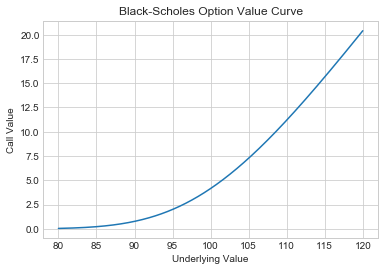

In [11]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()

plt.title("Black-Scholes Option Value Curve")
plt.xlabel("Underlying Value")
plt.ylabel("Call Value")

xs = np.linspace(80.0, 120.0, 400)
ys = []
for x in xs:
	u.setValue(x)
	ys.append(option.NPV())
plt.plot(xs, ys)

In [12]:
u.setValue(105.0)
r.setValue(0.01)
sigma.setValue(0.20)
print(option.NPV())

r.setValue(0.03)
print(option.NPV())

sigma.setValue(0.25)
print(option.NPV())

u.setValue(105.0)
r.setValue(0.01)
sigma.setValue(0.20)
print(option.NPV())


7.27556357927846
7.624029148527754
8.531296969971573
7.27556357927846


6.560073820974377


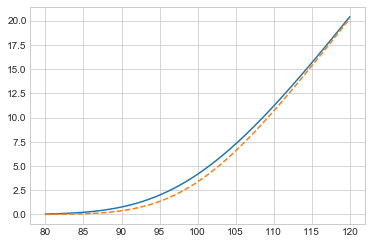

In [13]:
Settings.instance().evaluationDate = Date(7, April, 2014)
print(option.NPV())

plt.plot(xs, ys)
ys = []
for x in xs:
	u.setValue(x)
	ys.append(option.NPV())
plt.plot(xs, ys, '--')
plt.show()
